## Introduction to Probabilistic Latent Semantic Analysis (PLSA)

Probabilistic Latent Semantic Analysis (PLSA) stands as a sophisticated and influential probabilistic generative model in the realm of natural language processing and topic modeling. It represents a significant advancement over earlier models like Latent Semantic Analysis (LSA) by introducing a probabilistic framework that allows for more nuanced and accurate modeling of the underlying semantic structure of text corpora.

### The Need for PLSA

Textual data inherently possesses a high-dimensional nature, often comprising thousands or even millions of unique words. Extracting meaningful patterns and structure from such data is a complex task. Traditional approaches, like LSA, offer insights into semantic relationships, but they exhibit limitations:

- LSA lacks an inherent probabilistic foundation, making it challenging to assign probabilities to topics, documents, or words.
- LSA relies on linear algebra techniques and does not explicitly model the generative process of documents.
- LSA treats term-document relationships deterministically, potentially oversimplifying the intricate nature of language.

PLSA emerged as a solution to these challenges by embracing a probabilistic modeling approach. It is based on the premise that documents are generated probabilistically based on latent (hidden) topics, and words are generated probabilistically based on these topics. Here's a more detailed introduction to the key concepts of PLSA:

### Key Concepts of PLSA

1. **Latent Topics**:
   - PLSA posits the existence of latent (hidden) topics in a collection of documents. These topics are not directly observable but can be inferred from the words in the documents.
   - Each topic is characterized by a probability distribution over words, implying that each topic consists of a set of words with associated probabilities.

2. **Generative Process**:
   - PLSA introduces a generative process that elucidates how documents are created. It models the probability of selecting a topic for a document and the probability of generating each word based on the selected topics.
   - Documents are conceptualized as mixtures of topics, with the choice of topics for a document being probabilistic.

3. **Parameter Estimation**:
   - PLSA seeks to estimate the parameters of the model, encompassing the topic-word probabilities and the document-topic probabilities.
   - Estimation is typically accomplished using Expectation-Maximization (EM) or analogous iterative algorithms.

4. **Topic Inference**:
   - Post-training, PLSA facilitates the inference of topics present in a document or the identification of the most pertinent topics for a set of documents.
   - It assigns probabilities to topics for each document and words for each topic, allowing for probabilistic topic assignments.

### Advantages of PLSA

- **Probabilistic Framework**: PLSA offers a natural probabilistic framework for modeling document generation, enhancing its versatility and expressiveness.
- **Captures Word Ambiguity**: PLSA captures the probabilistic nature of word ambiguity, recognizing that a word can belong to multiple topics with varying probabilities.
- **Interpretability**: PLSA represents topics as word distributions, elevating the interpretability of topics.

In conclusion, Probabilistic Latent Semantic Analysis (PLSA) represents a significant leap forward in the domain of topic modeling. Its probabilistic nature enables a more accurate depiction of the generative process of documents, making it a valuable tool for unveiling latent topics within extensive text corpora and gaining deeper insights into the semantic structure of textual data.


## Implementation

In [1]:
!pip install plsa
!pip install numpy
!pip install matplotlib
!pip install jieba


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sys
import matplotlib.pyplot as plt
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA

In [4]:
%matplotlib notebook
sys.path.append('..')

In [ ]:
!mkdir blogs

In [7]:
csv_file = r'preprocessed_csvs\train_no_simplify.csv'
directory = 'blogs'

In [8]:
pipeline = Pipeline(*DEFAULT_PIPELINE)
pipeline

Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: LemmatizeWords
7: RemoveStopwords
8: short_word_remover

In [9]:
corpus = Corpus.from_xml(directory, pipeline)
corpus

Corpus:
Number of documents: 0
Number of words:     0

In [10]:
corpus = Corpus.from_csv(csv_file, pipeline)
corpus


Corpus:
Number of documents: 1000
Number of words:     11605

In [11]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nukal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
n_topics = 20

In [14]:
plsa = PLSA(corpus, n_topics, True)
plsa

PLSA:
====
Number of topics:     20
Number of documents:  1000
Number of words:      11605
Number of iterations: 0

In [15]:
result = plsa.fit()
plsa

PLSA:
====
Number of topics:     20
Number of documents:  1000
Number of words:      11605
Number of iterations: 82

In [16]:
result = plsa.best_of(5)

In [17]:
result.topic

array([0.08258585, 0.05991657, 0.05925608, 0.05343272, 0.05039436,
       0.04975611, 0.04951418, 0.04945839, 0.04889534, 0.04889088,
       0.04870157, 0.04845129, 0.04819053, 0.04817127, 0.04811959,
       0.04409116, 0.04373457, 0.0426923 , 0.04022618, 0.03552104])

In [18]:
new_doc = 'Hello! This is the federal humpty dumpty agency for state funding.'

topic_components, number_of_new_words, new_words = result.predict(new_doc)

print('Relative topic importance in new document:', topic_components)
print('Number of previously unseen words in new document:', number_of_new_words)
print('Previously unseen words in new document:', new_words)

Relative topic importance in new document: [0.17584323 0.01976981 0.02045375 0.01186173 0.00926915 0.04056608
 0.00175929 0.0102175  0.00344129 0.01814877 0.06886804 0.03178481
 0.26103428 0.0035111  0.08193503 0.02230893 0.01330795 0.03120737
 0.17380678 0.00090513]
Number of previously unseen words in new document: 2
Previously unseen words in new document: ('humpty', 'dumpty')


In [19]:
result.word_given_topic[0][:10]

(('jesus', 0.02459988449048729),
 ('god', 0.01374273225095307),
 ('matthew', 0.010458814139345012),
 ('truth', 0.009521607469717072),
 ('christian', 0.008275158987579368),
 ('belief', 0.00817556876336229),
 ('prophecy', 0.00795850395297187),
 ('people', 0.006772978064145417),
 ('psalm', 0.006586348099011203),
 ('christianity', 0.006543059209281044))

In [20]:
visualize = Visualize(result)
visualize

Visualize:
Number of topics:    20
Number of documents: 1000
Number of words:     11605

## Visualizations:

<IPython.core.display.Javascript object>


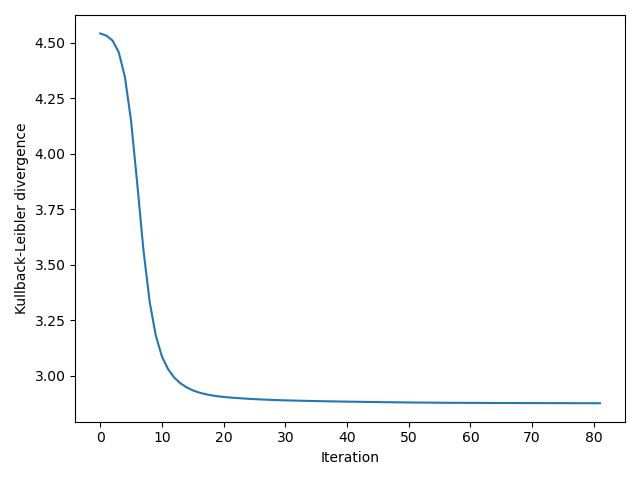

In [21]:
fig, ax = plt.subplots()
_ = visualize.convergence(ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


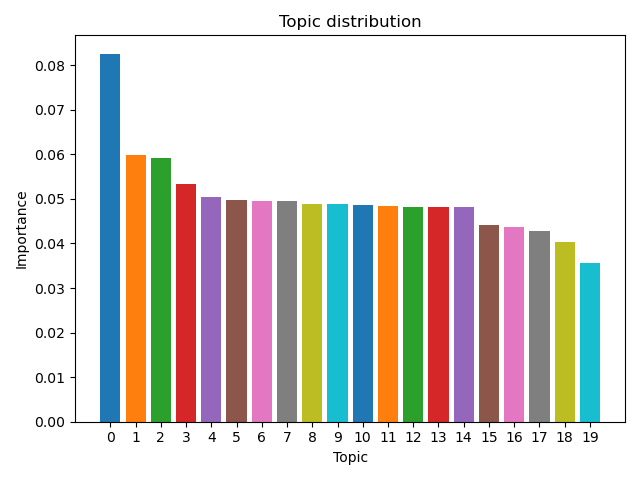

In [22]:
fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


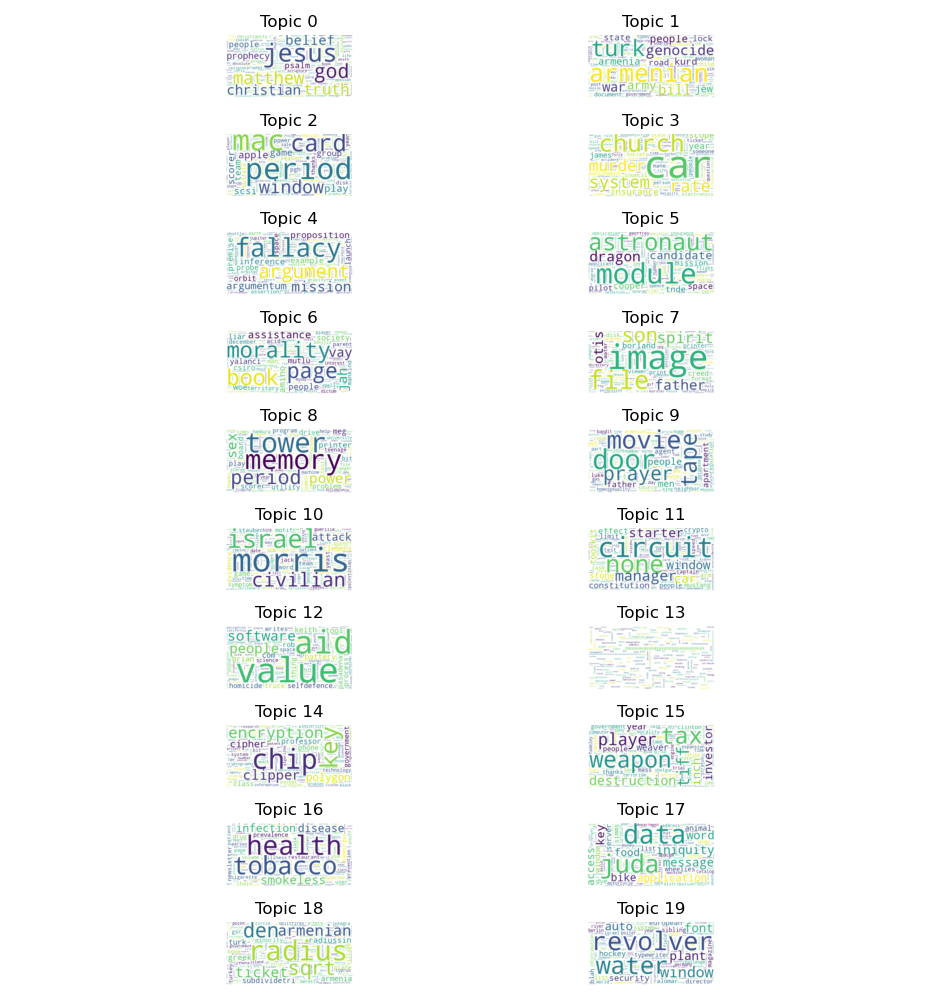

In [23]:
fig = plt.figure(figsize=(9.4, 10))
_ = visualize.wordclouds(fig)

#### Topic distributions

<IPython.core.display.Javascript object>


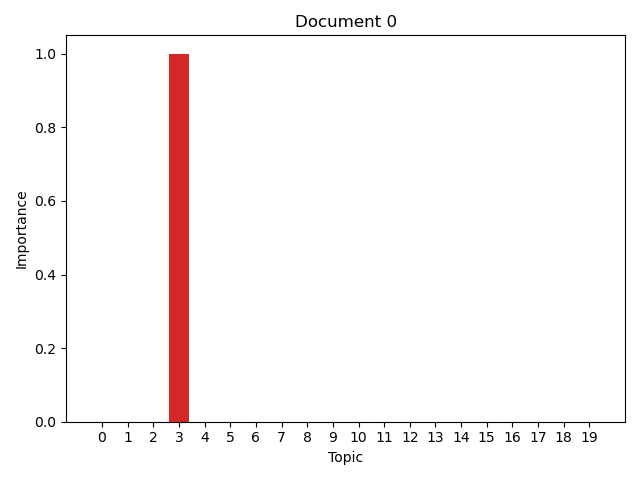

In [24]:
fig, ax = plt.subplots()
_ = visualize.topics_in_doc(0, ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


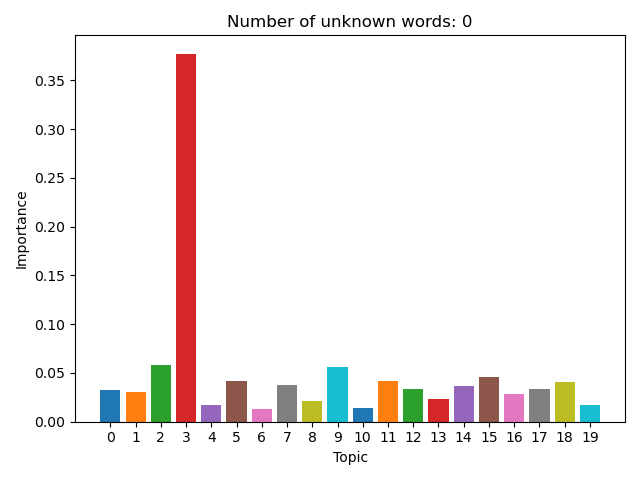

In [25]:
for first in corpus.raw:
    if first:
        break

fig, ax = plt.subplots()
_ = visualize.prediction(first, ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


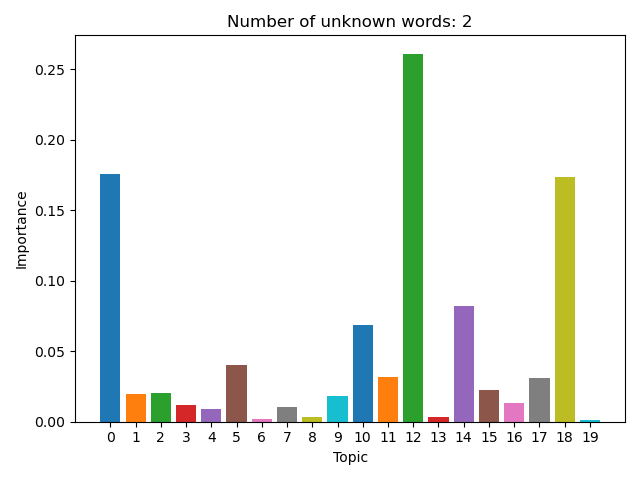

In [26]:
new_doc = 'Hello! This is the federal humpty dumpty agency for state funding.'

fig, ax = plt.subplots()
_ = visualize.prediction(new_doc, ax)
fig.tight_layout()
fig.savefig('my_plot.png')

In [27]:
test_csv_file = 'test_no_simplify.csv'  # Path to your test data
test_corpus = Corpus.from_csv(test_csv_file, pipeline)
test_corpus

Corpus:
Number of documents: 1000
Number of words:     10139

In [28]:
test_csv_file = 'test_no_simplify.csv'  # Path to your test data
test_corpus = Corpus.from_csv(test_csv_file, pipeline)
print(f"Test Corpus:\n======\nNumber of documents: {test_corpus.n_docs}\nNumber of words:     {test_corpus.n_words}")

test_results = []

# Iterate through each document using the 'get_doc' method
for doc_index in range(test_corpus.n_docs):
    doc = test_corpus.get_doc(doc_index)
    
    # Check if the document is empty after preprocessing
    if not doc or len(doc.split()) == 0:  # Adjust this condition based on how 'doc' is formatted
        print(f"Document at index {doc_index} is empty after preprocessing.")
        continue  # Skip this document
    
    topic_dist, _, _ = result.predict(doc)
    most_likely_topic = topic_dist.argmax()
    test_results.append({
        'document': doc,
        'most_likely_topic': most_likely_topic,
        'confidence': topic_dist[most_likely_topic]
    })

# ... (rest of your code)


# Optionally, print the results for the first few documents to check
for res in test_results[:5]:
    print(f"Document: {res['document']}")  # Adjust this if 'doc' is not a string but, e.g., a list of words
    print(f"Most Likely Topic: {res['most_likely_topic']}")
    print(f"Confidence: {res['confidence']:.2%}\n")


Test Corpus:
Number of documents: 1000
Number of words:     10139


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
print(dir(corpus))  # Replace 'corpus' with your actual Corpus object


In [36]:
import pandas as pd

# Step 1: Read the CSV File
csv_file = 'test_no_simplify.csv'  # Update with the path to your CSV file
df = pd.read_csv(csv_file)

# Ensure 'clean_text' column exists
if 'clean_text' not in df.columns:
    raise ValueError("CSV does not have a 'clean_text' column.")

# Initialize a list to hold the most likely topics
dominant_topics = []
tc=[]
# Step 2 & 3: Iterate through the 'clean_text' column and Predict
for text in df['clean_text'].dropna():
    topic_components, _, _ = result.predict(text)
    tc.append(topic_components)
    most_likely_topic_index = topic_components.argmax()
    dominant_topics.append(most_likely_topic_index)

# If there were any NaN values in 'clean_text', we need to handle the length difference
if len(dominant_topics) != len(df):
    # Fill the missing values with a default value or NaN
    # Here, we're choosing NaN, but you might choose a specific number to indicate missing data
    dominant_topics += [float('nan')] * (len(df) - len(dominant_topics))

if len(tc) != len(df):
    # Fill the missing values with a default value or NaN
    # Here, we're choosing NaN, but you might choose a specific number to indicate missing data
    tc += [float('nan')] * (len(df) - len(tc))    
    
# Step 4: Add the predictions to the DataFrame
df['dominant_topic'] = dominant_topics
df['tc'] = tc
# Now df includes the 'dominant_topic' column with the most likely topic index for each document
print(df.head())  # Print the first few rows of the DataFrame to confirm


                                                text  category  \
0  From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...         7   
1  From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...         5   
2  From: mathew <mathew@mantis.co.uk>\nSubject: R...         0   
3  From: bakken@cs.arizona.edu (Dave Bakken)\nSub...        17   
4  From: livesey@solntze.wpd.sgi.com (Jon Livesey...        19   

                                          clean_text  dominant_topic  \
0  subject need info bonneville organization univ...               0   
1  rick miller subject xface organization lines d...               2   
2  mathew subject strong weak atheism organizatio...               4   
3  subject saudi debut human rights group keyword...               0   
4  subject years say christian morality organizat...               3   

                                                  tc  
0  [0.09499871254353129, 0.04688009230761668, 0.0...  
1  [0.015518850664301947, 0.03620605395181048, 0....  
2  [0

In [38]:
df.head()

text  category  \
0  From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...         7   
1  From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...         5   
2  From: mathew <mathew@mantis.co.uk>\nSubject: R...         0   
3  From: bakken@cs.arizona.edu (Dave Bakken)\nSub...        17   
4  From: livesey@solntze.wpd.sgi.com (Jon Livesey...        19   

                                          clean_text  dominant_topic  \
0  subject need info bonneville organization univ...               0   
1  rick miller subject xface organization lines d...               2   
2  mathew subject strong weak atheism organizatio...               4   
3  subject saudi debut human rights group keyword...               0   
4  subject years say christian morality organizat...               3   

                                                  tc  
0  [0.09499871254353129, 0.04688009230761668, 0.0...  
1  [0.015518850664301947, 0.03620605395181048, 0....  
2  [0.07345834001098778, 0.015948232105549298, 0....  
3  [0.1257422537315978, 0.09861416231334708, 0.04...  
4  [0.036567044289354624, 0.03192204347194856, 0....

## Metrics calculations:
Calculating coherence score, Topic Divergence, Topic Exclusivity 

In [ ]:
output_file = 'test_output.csv'  # Update with your desired output path
df.to_csv(output_file, index=False)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
csv_file = 'test_output.csv'  # Update with the path to your CSV file
df = pd.read_csv(csv_file)

In [31]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import nltk

# Downloading necessary data for processing
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nukal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# Sample text data (Replace this with your actual text data)
texts = df['clean_text']

# Tokenization and preprocessing
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(texts)):
    texts[idx] = texts[idx].lower()  # Convert to lowercase.
    texts[idx] = tokenizer.tokenize(texts[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
texts = [[token for token in text if not token.isnumeric()] for text in texts]

# Remove words that are only one character.
texts = [[token for token in text if len(token) > 1] for text in texts]

# Remove stopwords
stop_words = set(stopwords.words('english'))
texts = [[token for token in text if token not in stop_words] for text in texts]



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(texts)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=1, no_above=0.5)

# Create a bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(text) for text in texts]


In [34]:
# Assuming 'result.word_given_topic' is your pLSA model result
# And you've already got your top words for the first topic as shown previously
topic_words = [word for word, prob in result.word_given_topic[0][:10]]  # Extracting words

# Convert to the format expected by CoherenceModel (list of lists of words)
topics = [topic_words]  # If you have more topics, append them to this list


In [35]:
# Compute Coherence Score using the 'c_v' measure
coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, corpus=corpus, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print('Coherence Score:', coherence_score)


Coherence Score: 0.6939596559518885


In [37]:
import numpy as np
from scipy.stats import entropy


In [39]:
# Example topic distributions (Replace with your actual topic distributions)
topics = df['tc']


In [40]:
def calculate_kl_divergence(topic1, topic2):
    """Calculate KL Divergence between two topics"""
    return entropy(topic1, topic2)

# Calculate pairwise KL Divergence
num_topics = len(topics)
kl_matrix = np.zeros((num_topics, num_topics))

for i in range(num_topics):
    for j in range(num_topics):
        if i != j:
            kl_matrix[i, j] = calculate_kl_divergence(topics[i], topics[j])


In [41]:
# Calculate the average off-diagonal values for topic diversity
topic_diversity = np.sum(kl_matrix) / (num_topics * (num_topics - 1))
print("Topic Diversity (KL Divergence):", topic_diversity)


Topic Diversity (KL Divergence): 0.5269772967137335


In [42]:
print(dir(plsa))

['_BasePLSA__e_step', '_BasePLSA__n_topics', '_BasePLSA__negative_entropy', '_BasePLSA__norm', '_BasePLSA__normalize', '_BasePLSA__random', '_BasePLSA__rel_change', '_BasePLSA__tf_idf', '_BasePLSA__validated', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_conditional', '_corpus', '_doc_given_topic', '_doc_word', '_invert', '_joint', '_kl_divergences', '_m_step', '_norm_sum', '_result', '_topic', '_word_given_topic', 'best_of', 'fit', 'n_topics', 'tf_idf']


In [43]:
# Check the type and shape if it's an array or list
print(type(plsa._word_given_topic))
if hasattr(plsa._word_given_topic, 'shape'):
    print(plsa._word_given_topic.shape)

print(type(plsa._topic))
if hasattr(plsa._topic, 'shape'):
    print(plsa._topic.shape)


<class 'numpy.ndarray'>
(11605, 20)
<class 'numpy.ndarray'>
(20,)


In [44]:
# Check the first few entries of the word-topic distribution
print(plsa._word_given_topic[:5, :])  # Adjust as needed to inspect the data


[[1.07327386e-03 9.49252615e-04 2.77972885e-03 4.65025281e-04
  1.02831979e-03 8.87245740e-04 4.80781027e-03 2.08876967e-03
  0.00000000e+00 0.00000000e+00 3.11079459e-03 1.74545938e-03
  1.47989202e-02 0.00000000e+00 2.23622623e-03 1.54717077e-03
  4.46464058e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.04311740e-04 1.33220338e-03 2.57556180e-04 2.25314043e-04
  1.86850100e-03 1.16174844e-03 2.92820535e-04 2.79731544e-04
  4.66223550e-04 6.39327773e-04 9.86934780e-04 5.72408941e-04
  7.93984151e-04 1.57727409e-03 1.00616719e-03 8.51712069e-04
  1.55638412e-03 1.29737302e-03 1.84955766e-04 3.84770083e-04]
 [2.36819639e-04 2.37428388e-04 1.42621807e-04 1.12502343e-04
  2.77264511e-04 8.58419445e-05 1.93396043e-04 2.16084152e-04
  5.83212163e-05 1.59105604e-04 1.54807344e-04 1.40155337e-04
  1.75543965e-04 1.96727407e-04 1.20277358e-04 2.33118517e-04
  2.26622446e-04 2.49481089e-04 7.46118991e-05 1.11703637e-04]
 [1.92620832e-03 3.15279835e-03 2.09438447e-03 1.69547178e-03
  2.1

In [52]:
import numpy as np

def calculate_average_topic_exclusivity(plsa_model):
    topic_word_prob = plsa_model._word_given_topic
    word_total_prob = topic_word_prob.sum(axis=1) + 1e-12

    num_topics = topic_word_prob.shape[1]
    exclusivity_scores = []
    for topic_id in range(num_topics):
        topic_prob = topic_word_prob[:, topic_id]
        exclusivity_score = np.sum(topic_prob / word_total_prob) / topic_prob.shape[0]  # Normalize by number of words
        exclusivity_scores.append(exclusivity_score)

    average_exclusivity = np.mean(exclusivity_scores)
    return average_exclusivity

# Usage:
average_exclusivity = calculate_average_topic_exclusivity(plsa)
print(f"Average Topic Exclusivity: {average_exclusivity}")


Average Topic Exclusivity: 0.04999999993320191


- **Average Topic Exclusivity (0.05):** This score suggests that the topics generated by the model have a relatively low level of exclusivity. In other words, the words within the topics are not highly distinctive and might be shared across multiple topics. This could indicate that the model struggles to create highly distinct and focused topics.

- **Topic Diversity (KL Divergence) (0.527):** Topic diversity, as measured by KL Divergence, indicates the degree of dissimilarity between topics. A score of 0.527 suggests that the topics are somewhat diverse but not highly distinct from each other. This means that there is room for improvement in terms of making the topics more unique and dissimilar.

- **Coherence Score (0.694):** The coherence score measures how semantically related the top words within each topic are. A score of 0.694 indicates moderate coherence, implying that the top words in each topic have some meaningful connection, but there is still room for improvement to make the topics more coherent and interpretable.

In summary, the scores collectively suggest that the topic modeling algorithm, as represented by these scores, may need further refinement. The topics generated have low exclusivity, moderate diversity, and moderate coherence. Enhancements to the model's parameters or preprocessing steps could lead to more distinct, diverse, and coherent topics, resulting in a more effective representation of the underlying structure in the text data.